## EU/UK House Price Index Data (2015 = 100)

Sources: 

[EU Eurostat](https://ec.europa.eu/eurostat/databrowser/)

[UK Land Registry](https://landregistry.data.gov.uk/app/ukhpi)

[EU GDP](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=EU&most_recent_value_desc=true)

Eurostat API Documentation: [Eurostat API](https://wikis.ec.europa.eu/display/EUROSTATHELP/API+-+Getting+started)

Packages used: [eurostat](https://pypi.org/project/eurostat/)

Eurostat is an official website of the European Union that offers access to datasets and statistics on a wide range of topics.
The information can be accessed programmatically through their API, which provides data in JSON-stat 2.0 format and supports REST protocol.
When making a query through the API, the response is a deeply nested json object, which is shown below for demonstration purposes.
Therefore, to analise the data we are using the Eurostat Python Package, which is a tool that uses Eurostat SDMX 2.1 API web services to retrieve and convert the information into a Pandas DataFrame.

### Obtaining and cleaning the data

In [3]:
# Import relevant modules

import requests
import json
import eurostat
import pandas as pd
from datetime import datetime

In [4]:
# Checking the information information in json format 
# Make request to API and display json object

r = requests.get('https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/prc_hpi_a?format=JSON&sinceTimePeriod=2015&geo=EA&geo=BE&geo=BG&geo=CZ&geo=DK&geo=DE&geo=EE&geo=IE&geo=ES&geo=FR&geo=HR&geo=IT&geo=CY&geo=LV&geo=LT&geo=LU&geo=HU&geo=MT&geo=NL&geo=AT&geo=PL&geo=PT&geo=RO&geo=SI&geo=SK&geo=FI&geo=SE&geo=IS&geo=NO&geo=CH&geo=UK&geo=TR&unit=I15_A_AVG&purchase=TOTAL&lang=en')
j = r.json()
j

{'version': '2.0',
 'class': 'dataset',
 'label': 'House price index (2015 = 100) - annual data',
 'source': 'ESTAT',
 'updated': '2023-07-05T11:00:00+0200',
 'value': {'152': 100.0,
  '153': 108.53,
  '154': 114.26,
  '155': 119.64,
  '156': 126.6,
  '157': 136.31,
  '158': 153.26,
  '159': 170.77,
  '8': 100.0,
  '9': 102.64,
  '10': 106.37,
  '11': 109.42,
  '12': 113.78,
  '13': 118.6,
  '14': 127.06,
  '15': 134.19,
  '16': 100.0,
  '17': 107.02,
  '18': 116.3,
  '19': 123.96,
  '20': 131.42,
  '21': 137.41,
  '22': 149.33,
  '23': 169.92,
  '96': 100.0,
  '97': 100.27,
  '98': 102.52,
  '99': 104.32,
  '100': 108.2,
  '101': 107.98,
  '102': 104.33,
  '103': 107.71,
  '24': 100.0,
  '25': 107.2,
  '26': 119.7,
  '27': 130.0,
  '28': 141.9,
  '29': 153.9,
  '30': 184.2,
  '31': 215.3,
  '40': 100.0,
  '41': 107.5,
  '42': 114.1,
  '43': 121.7,
  '44': 128.7,
  '45': 138.7,
  '46': 154.7,
  '47': 162.9,
  '32': 100.0,
  '33': 105.22,
  '34': 110.0,
  '35': 114.81,
  '36': 117.51,
 

In [5]:
# Obtaining and filtering information through Eurostat Python package

# Dataset code
code = 'PRC_HPI_A'

# Getting filter parameters for the selected code
pars = eurostat.get_pars(code)
pars

['freq', 'purchase', 'unit', 'geo']

In [6]:
print(eurostat.get_par_values(code, 'purchase'))
print(eurostat.get_par_values(code, 'unit'))
print(eurostat.get_par_values(code, 'geo'))

['TOTAL', 'DW_NEW', 'DW_EXST']
['I10_A_AVG', 'I15_A_AVG', 'RCH_A_AVG']
['EU', 'EU27_2020', 'EU28', 'EA', 'EA20', 'EA19', 'BE', 'BG', 'CZ', 'DK', 'DE', 'EE', 'IE', 'ES', 'FR', 'HR', 'IT', 'CY', 'LV', 'LT', 'LU', 'HU', 'MT', 'NL', 'AT', 'PL', 'PT', 'RO', 'SI', 'SK', 'FI', 'SE', 'IS', 'NO', 'CH', 'UK', 'TR']


In [7]:
# Creating the desired filters

regions = ['EU', 'BE', 'BG', 'CZ', 'DK', 'DE', 'EE', 'IE', 'ES', 'FR', 'HR', 'IT', 'CY', 'LV', 'LT', 'LU', 'HU', 'MT', 'NL', 'AT', 'PL', 'PT',
        'RO', 'SI', 'SK', 'FI', 'SE', 'IS', 'NO', 'UK']

my_filter_pars = {'unit': 'I15_A_AVG', 'purchase': 'TOTAL', 'geo': regions, 'startPeriod': 2006}

# Creating the dataframe

df_euhouseindex = eurostat.get_data_df(code, filter_pars=my_filter_pars)

In [8]:
# Display columns and first five rows

df_euhouseindex.head()

,freq,purchase,unit,geo\TIME_PERIOD,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,TOTAL,I15_A_AVG,EU,93.43,101.29,101.85,97.29,98.46,98.77,...,95.77,97.34,100.0,104.68,109.60,114.79,119.74,126.19,136.79,147.31
1,A,TOTAL,I15_A_AVG,BE,79.56,85.76,89.54,89.12,91.92,95.61,...,98.90,98.35,100.0,102.64,106.37,109.42,113.78,118.60,127.06,134.19
2,A,TOTAL,I15_A_AVG,BG,91.86,118.42,147.97,117.79,105.81,99.98,...,95.92,97.29,100.0,107.02,116.30,123.96,131.42,137.41,149.33,169.92
3,A,TOTAL,I15_A_AVG,CZ,NaN,NaN,100.80,96.90,95.20,95.30,...,93.90,96.20,100.0,107.20,119.70,130.00,141.90,153.90,184.20,215.30
4,A,TOTAL,I15_A_AVG,DK,102.89,105.65,100.19,88.19,90.66,89.12,...,90.09,93.49,100.0,105.22,110.00,114.81,117.51,123.48,137.98,137.33


In [9]:
# Dropping unnecessary columns

df_euhouseindex.drop(['freq', 'purchase', 'unit'], axis=1, inplace=True)

In [10]:
# Check dataframe information

df_euhouseindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   geo\TIME_PERIOD  30 non-null     object 
 1   2006             20 non-null     float64
 2   2007             23 non-null     float64
 3   2008             26 non-null     float64
 4   2009             27 non-null     float64
 5   2010             30 non-null     float64
 6   2011             30 non-null     float64
 7   2012             30 non-null     float64
 8   2013             30 non-null     float64
 9   2014             30 non-null     float64
 10  2015             30 non-null     float64
 11  2016             30 non-null     float64
 12  2017             30 non-null     float64
 13  2018             30 non-null     float64
 14  2019             30 non-null     float64
 15  2020             29 non-null     float64
 16  2021             29 non-null     float64
 17  2022             2

After checking the dataframe created with the information retrieved from the API, we can see that there are some missing values. Most of them correspond to the years 2006-2009 and only for some countries which aren't crucial to our analysis. But we can see that the HPI information for the UK is missing since 2020, when it left the EU. This information is important so we will later on proceed to add the figures obtained from official UK Government Data.

In [11]:
# Checking UK information. We can see the HPI for 2020 to 2022 is missing.

df_euhouseindex.tail()

,geo\TIME_PERIOD,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
25,FI,81.56,86.37,87.06,88.31,93.88,96.87,99.21,100.35,100.00,100.0,101.29,102.39,103.34,103.77,105.60,110.45,111.75
26,SE,58.46,65.74,66.47,68.57,73.97,75.87,76.83,80.79,88.40,100.0,108.24,115.43,114.35,117.19,122.11,134.46,139.25
27,IS,70.79,77.44,82.26,74.28,72.02,75.36,80.57,85.21,92.39,100.0,109.77,131.20,142.01,148.29,157.79,177.57,214.84
28,NO,61.66,69.43,68.69,69.99,75.77,81.95,87.48,91.24,93.74,100.0,107.88,113.75,115.53,120.18,126.11,137.66,145.71
29,UK,85.10,93.54,89.41,81.44,86.15,84.88,85.20,87.39,94.40,100.0,106.99,111.86,115.53,116.67,NaN,NaN,NaN


Up until this point, we have created the dataframe by downloading the information in the Eurostat API. The next cell should be executed only if creating the DataFrame from the Microsoft Excel sheet provided as back up.

In [13]:
#df_euhouseindex = pd.read_excel('../../Datasets/02_clean_data_files/eu_hpi.xls', sheet_name = 'Sheet 1')

In [14]:
# Renaming and changing dataframe index

df_euhouseindex.rename(columns={"geo\TIME_PERIOD": "Geo"}, inplace=True)
df_euhouseindex = df_euhouseindex.set_index(['Geo'])

In [16]:
# Create dataframes for missing data (UK HPI)
# Calculation method remains the same as the data from Eurostat (yearly average, base 2015=100)

uk_hpi = pd.read_csv('../../Datasets/02_clean_data_files/uk_hpi.csv')

In [17]:
# Add missing data for UK 2020-2022

df_euhouseindex.loc['UK', ['2020', '2021', '2022']] = uk_hpi['House price index All property types'].to_list()

In [18]:
# Transpose dataframe for better readability and consistency with other datasets. Move UK column to the second position. Convert index to numeric. Display complete data

df_euhouseindex = df_euhouseindex.transpose()
df_euhouseindex.index = pd.to_numeric(df_euhouseindex.index)
col = df_euhouseindex.pop('UK')
df_euhouseindex.insert(1, 'UK', col)
pd.set_option('display.max_columns', None)
df_euhouseindex

Geo,EU,UK,BE,BG,CZ,DK,DE,EE,EI,ES,FR,HR,IT,CY,LV,LT,LU,HU,MT,NL,AT,PL,PT,RO,SI,SK,FI,SE,IS,NO
2006,93.43,85.10,79.56,91.86,NaN,102.89,83.0,88.22,151.50,135.50,94.51,NaN,NaN,108.57,104.48,94.25,NaN,NaN,70.04,110.73,NaN,NaN,NaN,NaN,NaN,75.99,81.56,58.46,70.79,61.66
2007,101.29,93.54,85.76,118.42,NaN,105.65,81.2,106.54,162.81,148.79,100.57,NaN,NaN,121.32,142.37,119.06,74.42,98.91,84.75,116.10,NaN,NaN,NaN,NaN,120.85,98.00,86.37,65.74,77.44,69.43
2008,101.85,89.41,89.54,147.97,100.8,100.19,82.3,96.29,151.51,146.66,101.52,124.14,NaN,128.17,143.94,129.76,76.91,101.26,94.14,118.64,NaN,NaN,107.53,NaN,129.31,115.55,87.06,66.47,82.26,68.69
2009,97.29,81.44,89.12,117.79,96.9,88.19,83.0,60.47,122.49,136.97,95.32,117.93,NaN,119.76,90.24,90.92,76.02,95.95,90.07,113.35,NaN,NaN,106.54,129.28,117.06,100.82,88.31,68.57,74.28,69.99
2010,98.46,86.15,91.92,105.81,95.2,90.66,83.9,63.90,105.96,134.55,99.74,110.47,118.1,112.90,80.35,84.20,80.14,93.66,91.04,111.40,76.80,105.61,107.36,119.54,117.21,96.78,93.88,73.97,72.02,75.77
2011,98.77,84.88,95.61,99.98,95.3,89.12,86.8,69.32,87.86,124.27,105.46,110.66,119.7,111.09,88.73,89.77,83.09,90.45,89.80,109.19,81.60,105.70,102.09,104.83,120.39,95.33,96.87,75.87,75.36,81.95
2012,96.94,85.20,97.75,98.07,93.9,86.71,89.8,74.37,76.04,105.90,104.88,108.93,116.7,107.70,91.36,89.56,86.58,87.10,92.54,101.86,87.57,102.01,94.87,99.51,112.09,92.75,99.21,76.83,80.57,87.48
2013,95.77,87.39,98.90,95.92,93.9,90.09,92.6,82.29,76.99,96.24,102.93,104.63,109.1,103.29,97.62,90.65,90.89,84.87,92.16,95.75,92.10,97.54,93.09,99.26,106.21,93.59,100.35,80.79,85.21,91.24
2014,97.34,94.40,98.35,97.29,96.2,93.49,95.5,93.58,89.72,96.54,101.36,102.98,104.0,101.47,103.48,96.47,94.88,88.43,94.51,96.53,95.33,98.50,97.04,97.22,99.20,94.91,100.00,88.40,92.39,93.74
2015,100.00,100.00,100.00,100.00,100.0,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


## Visualisation and analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

How does the UK House Price Index (HPI) compare to the rest of the region?

We can see that overall, the UK HPI follows closely the EU average HPI, however, the UK was more affected than the EU as a whole by the 2008 financial crisis. 
Between 2008 and 2009, the EU HPI fell by 4.5%, while in the UK, the HPI fell by 8.9%. 
The UK economy finally moved out of recession in the last quarter of 2009 and this is reflected in the evolution of the HPI. In 2010, the UK HPI is starting to recover, but it wasn't until 2014 that it finally surpassed pre-crisis levels. A similar pattern is seen the the EU HPI.
After this recovery period, we see a rapid growth of the HPI that was accelerated after the Covid-19 pandemic.

In [21]:
# Calculate how much the HPI dropped from between 2008 and 2009

eu_drop_2008 = (df_euhouseindex.loc[2008, 'EU'] - df_euhouseindex.loc[2009, 'EU']) / df_euhouseindex.loc[2008, 'EU'] * 100
uk_drop_2008 = (df_euhouseindex.loc[2008, 'UK'] - df_euhouseindex.loc[2009, 'UK']) / df_euhouseindex.loc[2008, 'UK'] * 100

print(f'EU HPI fall 2008: {eu_drop_2008:.1f}%')
print(f'UK HPI fall 2008: {uk_drop_2008:.1f}%')


EU HPI fall 2008: 4.5%
UK HPI fall 2008: 8.9%


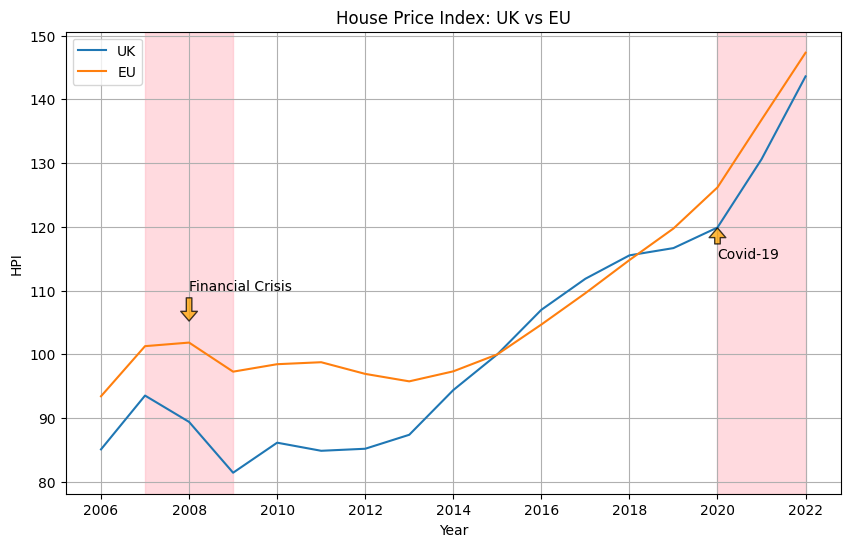

In [22]:
# UK vs EU House Price Index comparison

plt.figure(figsize=(10,6))

plt.plot(df_euhouseindex.UK, label='UK')
plt.plot(df_euhouseindex.EU, label='EU')

plt.title('House Price Index: UK vs EU')
plt.grid(True)
plt.ylabel('HPI')
plt.xlabel('Year')
plt.legend(loc="upper left")

plt.axvspan(2007, 2009, color='lightpink', alpha=0.5)
plt.axvspan(2020, 2022, color='lightpink', alpha=0.5)
plt.annotate('Financial Crisis', xy =(2008, 105),
                xytext =(2008, 110),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.75, headlength = 7), xycoords = 'data')
plt.annotate('Covid-19', xy =(2020, 120),
                xytext =(2020, 115),arrowprops = dict(facecolor ='orange',
                shrink = 0.05, alpha = 0.75, headlength = 7), xycoords = 'data')

plt.show()

The following charts will present an overview of how the House Price Index evolved in the UK, other european countries and the EU average.
We can see that while the UK House Price Index in 2022 (143.6) remains close to the EU average (147.3), other countries in Europe experimented far more drastic rises in house prices, such as Hungary (HPI 2022: 253.55), Czechia (HPI 2022: 215.30) and Iceland (HPI 2022: 214.84).

Text(204.0, 0.5, 'Year')

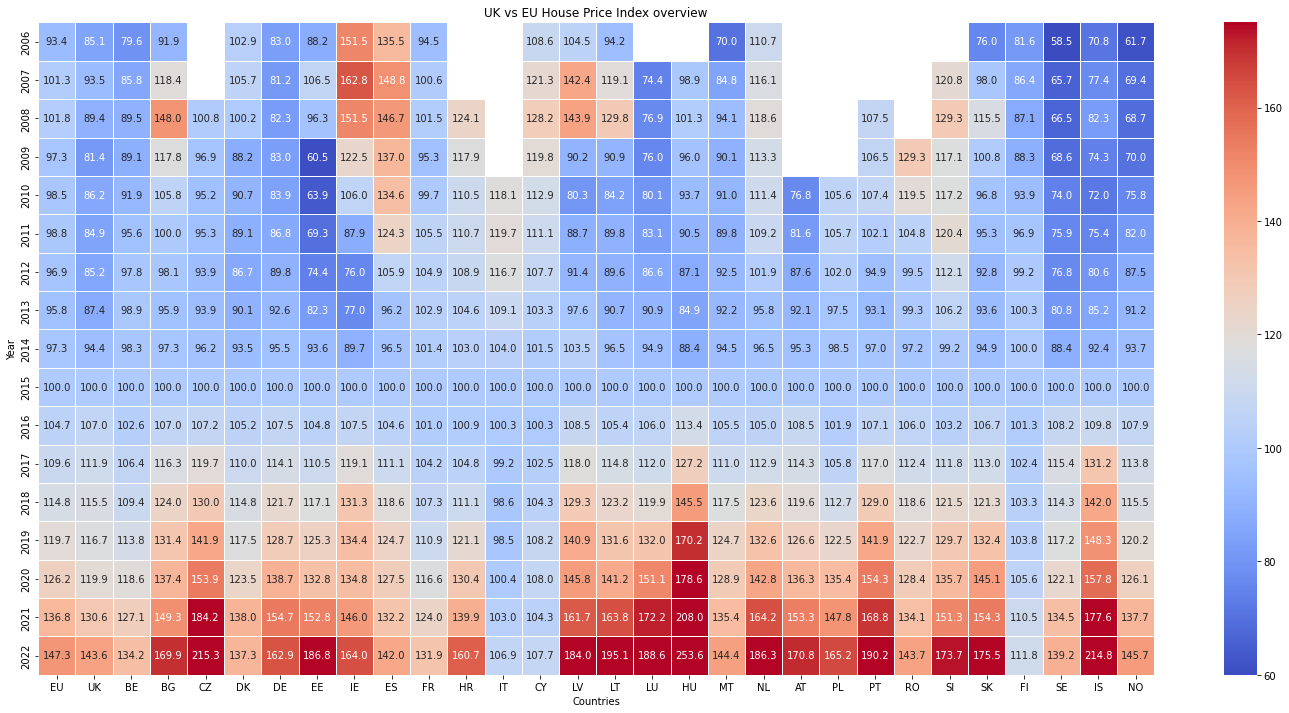

In [32]:
# UK vs EU countries House Price Index overview

plt.figure(figsize=(25,12))

cmap = sns.cm.rocket_r
sns.heatmap(df_euhouseindex, annot=True, fmt=".1f", linewidth=.5, cmap="coolwarm", vmin=60, vmax=175).set(title='UK vs EU House Price Index overview')
plt.xlabel('Countries')
plt.ylabel('Year')


In [26]:
# 2022 House Price Index ranking

df_euhouseindex.loc[2022].sort_values(ascending=False)

Geo
HU    253.55
CZ    215.30
IS    214.84
LT    195.05
PT    190.17
LU    188.60
EE    186.76
NL    186.29
LV    184.01
SK    175.47
SI    173.65
AT    170.77
BG    169.92
PL    165.21
EI    163.96
DE    162.90
HR    160.69
EU    147.31
NO    145.71
MT    144.45
RO    143.70
UK    143.60
ES    141.98
SE    139.25
DK    137.33
BE    134.19
FR    131.88
FI    111.75
CY    107.71
IT    106.90
Name: 2022, dtype: float64

The following chart compares the evolution of the House Price Index in the UK, vs the EU average, vs the top 5 european economies, in terms of nominal GDP.
To build it, we will use the bar_chart_race Python package.

In [29]:
import bar_chart_race as bcr

In [35]:
# UK House Price Index vs top EU economies (in terms of nominal GDP) and EU average

# Prepare data

topeu = df_euhouseindex.loc[2010:2022][['EU', 'UK', 'DE', 'FR', 'ES', 'NL', 'IT']]
topeu = topeu.rename(columns={'DE': 'Germany', 'FR': 'France', 'ES': 'Spain', 'NL': 'Netherlands', 'IT': 'Italy'})
topeu.index =  topeu.index.map(str)
topeu.sort_values(by='2022', axis=1, inplace=True)
topeu.head()

Geo,Italy,France,Spain,UK,EU,Germany,Netherlands
2010,118.1,99.74,134.55,86.15,98.46,83.9,111.40
2011,119.7,105.46,124.27,84.88,98.77,86.8,109.19
2012,116.7,104.88,105.90,85.20,96.94,89.8,101.86
2013,109.1,102.93,96.24,87.39,95.77,92.6,95.75
2014,104.0,101.36,96.54,94.40,97.34,95.5,96.53


In [36]:
# Create chart

bcr.bar_chart_race(df = topeu,
                   title= 'House Price Index Comparison (base 2015 = 100)',
                   filename=None,
                   steps_per_period=15,
                   period_length=1000,
                   title_size='smaller',
                   cmap='antique')  

c:\Users\Francisco\AppData\Local\Programs\Python\Python311\Lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
c:\Users\Francisco\AppData\Local\Programs\Python\Python311\Lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


Text(0.5, 0, 'HPI')

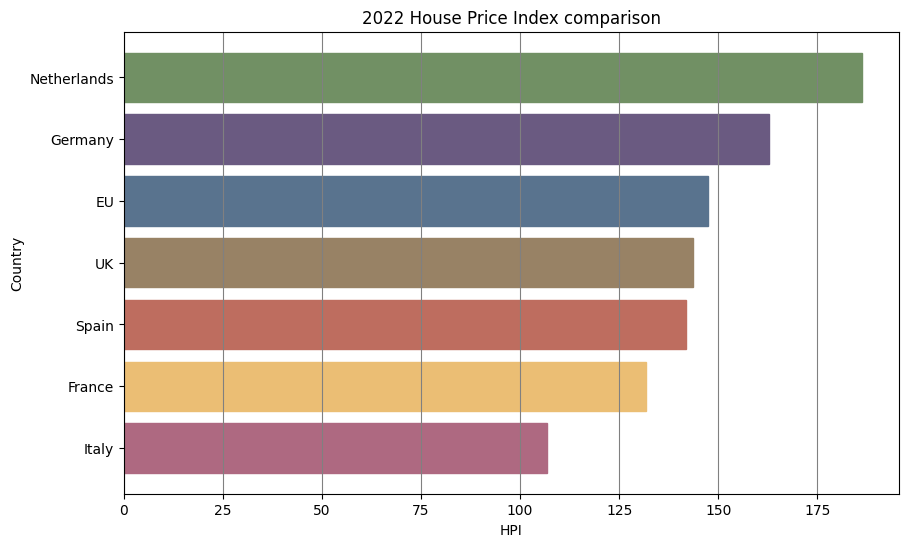

In [66]:
# Static version of the bar chart race above for the year 2022

plt.figure(figsize=(10,6))
plt.grid(axis='x', color='grey')
bars = plt.barh(y=topeu.columns, width=topeu.loc['2022'])

bars[6].set_color((104/235, 133/235, 92/235))
bars[5].set_color((98/235, 83/235, 119/235))
bars[4].set_color((82/235, 106/235, 131/235))
bars[3].set_color((140/235, 120/235, 93/235))
bars[2].set_color((175/235, 100/235, 88/235))
bars[1].set_color((217/235, 175/235, 107/235))
bars[0].set_color((160/235, 97/235, 119/235))

plt.title('2022 House Price Index comparison')

plt.ylabel('Country')
plt.xlabel('HPI')